In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seab
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.linear_model import LassoCV
import statsmodels.api as sm
from sklearn.feature_selection import RFE

In [2]:
input_file = pd.ExcelFile(r'C:\Users\Эличка\Desktop\input_data.xlsx')
print(input_file.sheet_names)
df = input_file.parse('input_data')

['input_data']


In [3]:
df

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
0,0.155051,0.974187,0.074675,0.442146,0.369443,0.468138,0.578846,0.422744,0.931543,0.474148,15
1,0.968379,0.716820,0.678846,0.510049,0.545299,0.573692,0.817491,0.206636,0.880111,0.574187,17
2,0.468263,0.405603,0.320325,0.468084,0.100995,0.974407,0.300062,0.608356,0.050082,0.762011,12
3,0.776820,0.103740,0.373748,0.797782,0.906810,0.599069,0.626680,0.924705,0.632768,0.512663,16
4,0.407886,0.415357,0.101543,0.935160,0.444124,0.193607,0.656837,0.599929,0.868582,0.405406,20
...,...,...,...,...,...,...,...,...,...,...,...
995,0.162843,0.435990,0.149917,0.665505,0.914584,0.630336,0.384881,0.407224,0.328757,0.994527,16
996,0.907179,0.737143,0.830932,0.799533,0.214602,0.800022,0.504500,0.494688,0.462960,0.276626,20
997,0.505830,0.163747,0.146821,0.667286,0.573377,0.585563,0.934153,0.312294,0.854859,0.607592,15
998,0.296363,0.720200,0.434514,0.755218,0.613471,0.940339,0.329413,0.763345,0.018250,0.474626,17


(array([ 23.,  69.,  94., 180., 159., 243., 144.,  46.,  37.,   5.]),
 array([ 3. ,  5.6,  8.2, 10.8, 13.4, 16. , 18.6, 21.2, 23.8, 26.4, 29. ]),
 <a list of 10 Patch objects>)

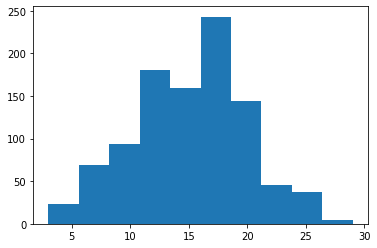

In [4]:
plt.hist(df['y'])
# multinomial distribution?

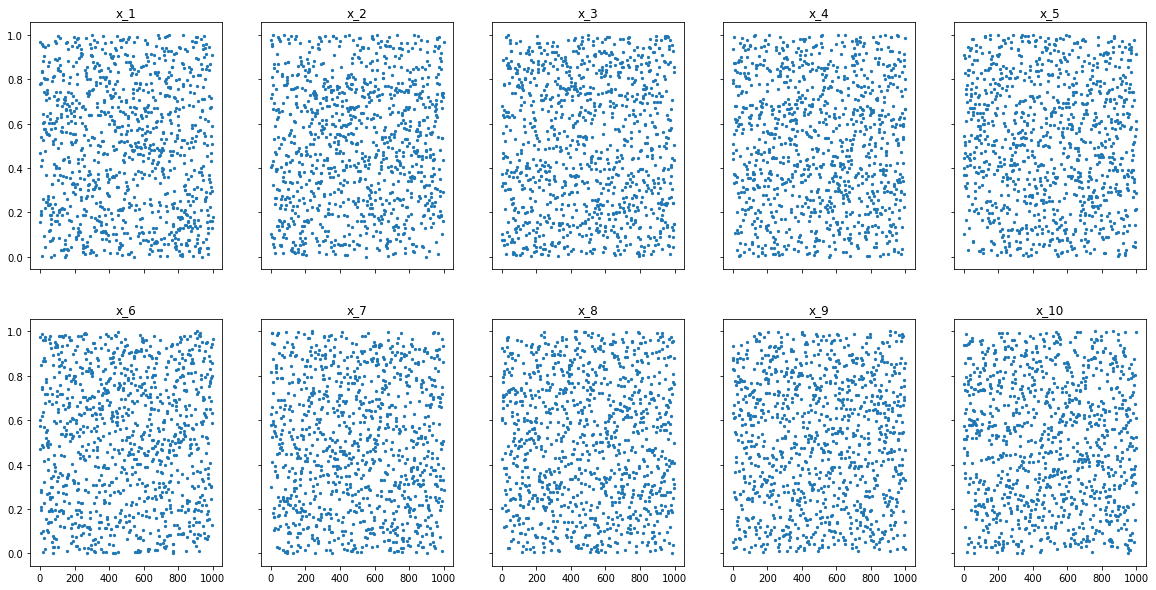

In [5]:
nrows = 2
ncols = 5
fig, ax = plt.subplots(figsize=(20, 10), nrows = nrows, ncols = ncols, sharex=True, sharey=True)
name_count=1
for i in range(nrows):
    for j in range(ncols):
        name = 'x_' + str(name_count+i+j)
        ax[i,j].scatter(range(len(df[name])), df[name], 5)
        ax[i,j].title.set_text(name)
    name_count+=ncols-1

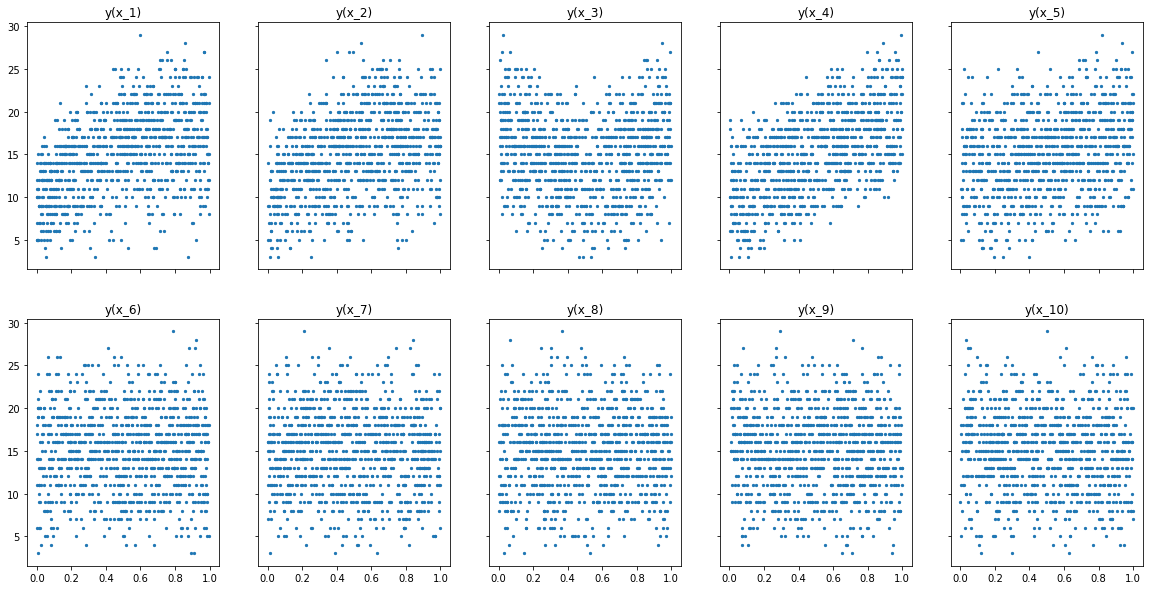

In [6]:
nrows = 2
ncols = 5
fig, ax = plt.subplots(figsize=(20, 10), nrows = nrows, ncols = ncols, sharex=True, sharey=True)
name_count=1
for i in range(nrows):
    for j in range(ncols):
        name = 'x_' + str(name_count + i + j)
        ax[i,j].scatter( df[name], df['y'], 5)
        ax[i,j].title.set_text('y(' + name + ')')
    name_count+=ncols-1

In [7]:
df.corr()
#y -> x_1 (0.43), x_2 (0.37), x_4(0.55), x_5(0.25)

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
x_1,1.000000,-0.030835,0.001454,-0.015437,0.007106,-0.014486,-0.033159,0.007990,-0.013455,-0.007319,0.429990
x_2,-0.030835,1.000000,0.000963,0.016744,-0.055180,-0.023885,-0.024692,0.008774,0.031948,-0.050875,0.370141
x_3,0.001454,0.000963,1.000000,0.031122,-0.037663,0.022369,0.016697,0.060331,0.011488,0.013534,-0.008855
x_4,-0.015437,0.016744,0.031122,1.000000,-0.062312,-0.021409,0.003136,-0.012517,0.001320,-0.042877,0.559228
x_5,0.007106,-0.055180,-0.037663,-0.062312,1.000000,0.052013,0.024136,0.013285,-0.052652,0.017760,0.252266
x_6,-0.014486,-0.023885,0.022369,-0.021409,0.052013,1.000000,-0.035630,-0.016145,-0.047458,-0.014605,-0.005472
x_7,-0.033159,-0.024692,0.016697,0.003136,0.024136,-0.035630,1.000000,0.012450,0.102675,0.013901,-0.028012
x_8,0.007990,0.008774,0.060331,-0.012517,0.013285,-0.016145,0.012450,1.000000,0.003916,0.045075,0.001281
x_9,-0.013455,0.031948,0.011488,0.001320,-0.052652,-0.047458,0.102675,0.003916,1.000000,-0.020683,-0.018830
x_10,-0.007319,-0.050875,0.013534,-0.042877,0.017760,-0.014605,0.013901,0.045075,-0.020683,1.000000,-0.062788


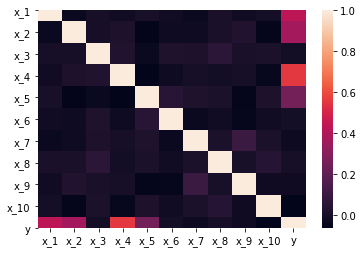

In [8]:
seab.heatmap(df.corr())

In [9]:
def split_data(df):
    target = np.ravel(df[['y']])
    train = df.drop(['y'], axis=1)
    x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.2)
    y_train, y_test = np.ravel(y_train), np.ravel(y_test)
    return x_train, x_test, y_train, y_test

In [10]:
def evaluate(x_test, y_test, model):
    tmp = {}
    model_name = str(model)
    tmp['Model'] = model_name[:model_name.index('(')] 
    tmp['MAE'] = mean_absolute_error(y_test, model.predict(x_test))
    tmp['MSE'] = mean_squared_error(y_test, model.predict(x_test))
    tmp['MeAE'] = median_absolute_error(y_test, model.predict(x_test))
    tmp['R2'] = r2_score(y_test, model.predict(x_test))
    tmp['EVR'] = explained_variance_score(y_test, model.predict(x_test))
    return tmp
    

In [11]:
def explore_models(models, x_train, y_train, x_test, y_test):
    test_models = pd.DataFrame()
    for model in models:
        model.fit(x_train, y_train) 
        tmp = evaluate(x_test, y_test, model)
        test_models = test_models.append([tmp])
    return test_models

In [12]:
models = [KNeighborsRegressor(n_neighbors=6),
          LinearRegression(),
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), 
          SVR(kernel='linear')]

In [13]:
x_train, x_test, y_train, y_test = split_data(df)

In [14]:
test_models = explore_models(models,x_train, y_train, x_test, y_test)

In [15]:
test_models

,Model,MAE,MSE,MeAE,R2,EVR
0,KNeighborsRegressor,2.055000,6.733056,1.666667,0.720067,0.720171
0,LinearRegression,1.866473,6.292104,1.462998,0.738400,0.739508
0,RandomForestRegressor,1.558550,3.983240,1.375000,0.834393,0.834563
0,SVR,1.875022,6.577240,1.431778,0.726545,0.726578


 RandomForestRegressor showed better result than the other. So next we will try to improve it.

In [16]:
feature_selection = pd.DataFrame()
feature_selection = feature_selection.append(test_models.iloc[2])

 ## __Feature selection__

__Filter method__

According to the correlation matrix, the output variable *y* correlates with the variables *x_1, x_2, x_4, x_5*. Therefore drop variables that are poorly correlated with the output variable.

In [17]:
fs_df = df.drop(columns = ['x_3', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10'])

In [18]:
fs_df

,x_1,x_2,x_4,x_5,y
0,0.155051,0.974187,0.442146,0.369443,15
1,0.968379,0.716820,0.510049,0.545299,17
2,0.468263,0.405603,0.468084,0.100995,12
3,0.776820,0.103740,0.797782,0.906810,16
4,0.407886,0.415357,0.935160,0.444124,20
...,...,...,...,...,...
995,0.162843,0.435990,0.665505,0.914584,16
996,0.907179,0.737143,0.799533,0.214602,20
997,0.505830,0.163747,0.667286,0.573377,15
998,0.296363,0.720200,0.755218,0.613471,17


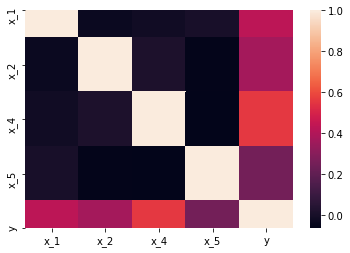

In [19]:
seab.heatmap(fs_df.corr())

In [20]:
x_train_fs, x_test_fs, y_train_fs, y_test_fs = split_data(fs_df)

In [21]:
model = RandomForestRegressor(n_estimators=100, max_features ='sqrt')
model.fit(x_train_fs, y_train_fs)
fs_model = evaluate(x_test_fs, y_test_fs, model)
fs_model['method'] = 'Filter'
feature_selection = feature_selection.append([fs_model], sort = True)
feature_selection.iloc[0, feature_selection.columns.get_loc('method')] = 'No selction'

In [22]:
feature_selection

,EVR,MAE,MSE,MeAE,Model,R2,method
0,0.834563,1.55855,3.983240,1.375,RandomForestRegressor,0.834393,No selction
0,0.847346,1.43145,3.292333,1.165,RandomForestRegressor,0.846905,Filter


 R2 and EVR metrics become higher after feature selection and MAE, MSE, MeAE become smaller.

__Embedded method__

In [23]:
# Apply feature selection using embedded method
target = np.ravel(df[['y']])
train = df.drop(['y'], axis=1)
emb_fs = LassoCV(cv=3)
emb_fs.fit(train, np.ravel(target))
print("Best alpha using LassoCV: %f" %emb_fs.alpha_)
print("Best score using LassoCV: %f" %emb_fs.score(train, target))
coef = pd.Series(emb_fs.coef_, index = train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated " +  str(sum(coef == 0)) + " variables")

Best alpha using LassoCV: 0.014190
Best score using LassoCV: 0.738864
Lasso picked 7 variables and eliminated 3 variables


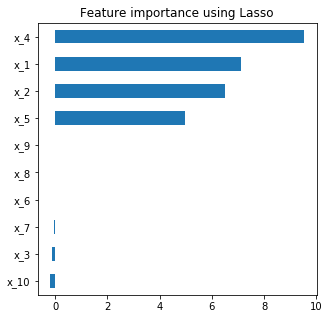

In [24]:
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (5, 5)
plt.title("Feature importance using Lasso")
imp_coef.plot(kind = "barh")

Lasso regularization method selected variables *x_4, x_1, x_2, x_5* as the most important. *x_7, x_3, x_10*  also affects the model, but to a lesser extent. Сheck the performance of the RandomForestRegressor with the features found.

In [25]:
fs_df_emb = df.drop(columns = ['x_6', 'x_9', 'x_8'])

In [26]:
fs_df_emb

,x_1,x_2,x_3,x_4,x_5,x_7,x_10,y
0,0.155051,0.974187,0.074675,0.442146,0.369443,0.578846,0.474148,15
1,0.968379,0.716820,0.678846,0.510049,0.545299,0.817491,0.574187,17
2,0.468263,0.405603,0.320325,0.468084,0.100995,0.300062,0.762011,12
3,0.776820,0.103740,0.373748,0.797782,0.906810,0.626680,0.512663,16
4,0.407886,0.415357,0.101543,0.935160,0.444124,0.656837,0.405406,20
...,...,...,...,...,...,...,...,...
995,0.162843,0.435990,0.149917,0.665505,0.914584,0.384881,0.994527,16
996,0.907179,0.737143,0.830932,0.799533,0.214602,0.504500,0.276626,20
997,0.505830,0.163747,0.146821,0.667286,0.573377,0.934153,0.607592,15
998,0.296363,0.720200,0.434514,0.755218,0.613471,0.329413,0.474626,17


In [27]:
x_train_fs_emb, x_test_fs_emb, y_train_fs_emb, y_test_fs_emb = split_data(fs_df_emb)

In [28]:
model = RandomForestRegressor(n_estimators=100, max_features ='sqrt')
model.fit(x_train_fs_emb, y_train_fs_emb)
emb_model = evaluate(x_test_fs_emb, y_test_fs_emb, model)
emb_model['method'] = 'Embedded'
feature_selection = feature_selection.append([emb_model], sort = True)


In [29]:
feature_selection

,EVR,MAE,MSE,MeAE,Model,R2,method
0,0.834563,1.55855,3.983240,1.375,RandomForestRegressor,0.834393,No selction
0,0.847346,1.43145,3.292333,1.165,RandomForestRegressor,0.846905,Filter
0,0.853675,1.42195,3.035936,1.205,RandomForestRegressor,0.852503,Embedded


 Metric values are improved after including  *x_3, x_7, x_10*

**Backward Elimination**

In [30]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

cols = list(train.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(target, X_1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['x_1', 'x_2', 'x_4', 'x_5']


The set of features obtained by Backward Elimination method is the same as the set obtained by the filter method.

**Recursive feature elimination**

In [33]:
nof_list=np.arange(1,10)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    x_train, x_test, y_train, y_test = train_test_split(train, np.ravel(target), test_size = 0.2, random_state = 0)
    model = RandomForestRegressor()
    rfe = RFE(model, nof_list[n])
    x_train_rfe = rfe.fit_transform(x_train, y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe, y_train)
    score = model.score(x_test_rfe, y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 5
Score with 5 features: 0.853851


In [34]:
model = RandomForestRegressor()
rfe = RFE(model, 5)
x_rfe = rfe.fit_transform(train, np.ravel(target))  
model.fit(x_rfe, target)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True False False False False False]
[1 1 1 1 1 3 2 5 6 4]


In [35]:
fs_df_rfe = df.drop(columns = ['x_6', 'x_7', 'x_9', 'x_8', 'x_10'])
x_train_fs_rfe, x_test_fs_rfe, y_train_fs_rfe, y_test_fs_rfe = split_data(fs_df_rfe)

In [36]:
model = RandomForestRegressor(n_estimators=100, max_features ='sqrt')
model.fit(x_train_fs_rfe, y_train_fs_rfe)
rfe_model = evaluate(x_test_fs_rfe, y_test_fs_rfe, model)
rfe_model['method'] = 'RFE'
feature_selection = feature_selection.append([rfe_model], sort = True)

In [37]:
feature_selection

,EVR,MAE,MSE,MeAE,Model,R2,method
0,0.834563,1.55855,3.983240,1.375,RandomForestRegressor,0.834393,No selction
0,0.847346,1.43145,3.292333,1.165,RandomForestRegressor,0.846905,Filter
0,0.853675,1.42195,3.035936,1.205,RandomForestRegressor,0.852503,Embedded
0,0.894535,1.30730,2.738996,1.015,RandomForestRegressor,0.894506,RFE


In [78]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 7, 10]
min_samples_leaf = [1, 2, 5]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 7, 10], 'min_samples_leaf': [1, 2, 5], 'bootstrap': [True, False]}


In [79]:
grid_model = RandomForestRegressor()
grid_random = RandomizedSearchCV(estimator = grid_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
grid_random.fit(x_train_fs_rfe, y_train_fs_rfe)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [80]:
grid_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [94]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [False],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [97]:
grid_search.fit(x_train_fs_rfe, y_train_fs_rfe)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   40.6s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.6min finished


{'bootstrap': False,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}